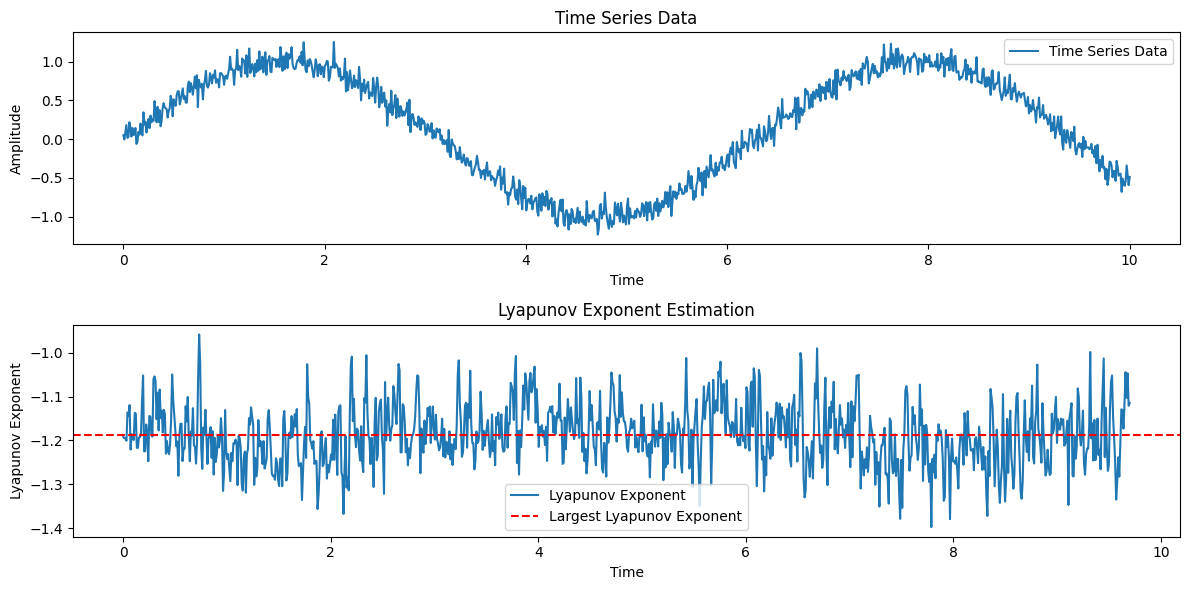

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def rosenstein_method(data, m, tau, num_neighbors=10, max_iterations=1000, epsilon=1e-10):
    """
    Rosenstein algorithm for estimating the largest Lyapunov exponent.

    Parameters:
    - data: 1D numpy array representing the time series data.
    - m: Embedding dimension.
    - tau: Time delay.
    - num_neighbors: Number of neighbors used for the local divergence rate estimation.
    - max_iterations: Maximum number of iterations for the algorithm.
    - epsilon: Small value to avoid logarithmic divergence.

    Returns:
    - lambda_max: Largest Lyapunov exponent.
    - lyapunov_time_series: Time series of estimated Lyapunov exponents.
    """
    n = len(data)
    x = np.array([data[i:(i + m)] for i in range(0, n - (m - 1) * tau)])

    lyapunov_time_series = np.zeros(n - m * tau)
    for i in range(n - m * tau):
        dist = np.linalg.norm(x - x[i], axis=1)
        sorted_dist_indices = np.argsort(dist)[:num_neighbors]
        delta_x = np.abs(x[sorted_dist_indices] - x[i])

        sum_log_dist = np.sum(np.log(dist[sorted_dist_indices] + epsilon))
        sum_delta_x = np.sum(np.log(delta_x + epsilon))
        lyapunov_time_series[i] = (1 / (tau * num_neighbors)) * (sum_delta_x - sum_log_dist)

    lambda_max = np.mean(lyapunov_time_series)

    return lambda_max, lyapunov_time_series

# Generate: time series data
np.random.seed(42)
t = np.linspace(0, 10, 1000)
data = np.sin(t) + 0.1 * np.random.randn(1000)

# parameters
embedding_dim = 3
time_delay = 10
num_neighbors = 10

# Run Rosenstein algorithm
lambda_max, lyapunov_time_series = rosenstein_method(data, embedding_dim, time_delay, num_neighbors)

# Plot1
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, data, label='Time Series Data')
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
# Plot2
plt.subplot(2, 1, 2)
plt.plot(t[:len(lyapunov_time_series)], lyapunov_time_series, label='Lyapunov Exponent')
plt.axhline(y=lambda_max, color='r', linestyle='--', label='Largest Lyapunov Exponent')
plt.title('Lyapunov Exponent Estimation')
plt.xlabel('Time')
plt.ylabel('Lyapunov Exponent')
plt.legend()

plt.tight_layout()
plt.show()